<a href="https://colab.research.google.com/github/the-y-p/IPL2022/blob/main/ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip uninstall -y opencv-python


Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Successfully uninstalled opencv-python-4.1.2.30


In [3]:
pip install -U -q "tensorflow>=2.9.0" "tf-models-official"

     |████████████████████████████████| 511.7 MB 6.8 kB/s 
     |████████████████████████████████| 2.1 MB 37.9 MB/s 
     |████████████████████████████████| 5.8 MB 38.7 MB/s 
     |████████████████████████████████| 1.6 MB 54.3 MB/s 
     |████████████████████████████████| 438 kB 41.7 MB/s 
     |████████████████████████████████| 43 kB 1.5 MB/s 
     |████████████████████████████████| 4.6 MB 10.7 MB/s 
     |████████████████████████████████| 352 kB 38.5 MB/s 
     |████████████████████████████████| 636 kB 30.4 MB/s 
     |████████████████████████████████| 1.1 MB 41.6 MB/s 
     |████████████████████████████████| 47.8 MB 79 kB/s 
     |████████████████████████████████| 99 kB 6.6 MB/s 
     |████████████████████████████████| 237 kB 45.3 MB/s 
     |████████████████████████████████| 1.2 MB 48.4 MB/s 
     |████████████████████████████████| 92 kB 9.7 MB/s 


In [4]:
pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import pprint
import tempfile

from IPython import display
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

In [7]:
import tensorflow_models as tfm

# These are not in the tfm public API for v2.9. They will be available in v2.10
from official.vision.serving import export_saved_model_lib
import official.core.train_lib

In [8]:
exp_config = tfm.core.exp_factory.get_exp_config('resnet_imagenet')
tfds_name = 'cifar10'
ds_info = tfds.builder(tfds_name ).info
ds_info

tfds.core.DatasetInfo(
    name='cifar10',
    version=3.0.2,
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features from tiny images},
        institution = {},
        year = {2009}
    }""",
    redistribution_info=,
)

In [9]:
# Configure model
exp_config.task.model.num_classes = 10
exp_config.task.model.input_size = list(ds_info.features["image"].shape)
exp_config.task.model.backbone.resnet.model_id = 18

# Configure training and testing data
batch_size = 128

exp_config.task.train_data.input_path = ''
exp_config.task.train_data.tfds_name = tfds_name
exp_config.task.train_data.tfds_split = 'train'
exp_config.task.train_data.global_batch_size = batch_size

exp_config.task.validation_data.input_path = ''
exp_config.task.validation_data.tfds_name = tfds_name
exp_config.task.validation_data.tfds_split = 'test'
exp_config.task.validation_data.global_batch_size = batch_size

In [16]:
logical_device_names = [logical_device.name for logical_device in tf.config.list_logical_devices()]
"""
if 'GPU' in ''.join(logical_device_names):
  print('This may be broken in Colab.')
  device = 'GPU'
elif 'TPU' in ''.join(logical_device_names):
  print('This may be broken in Colab.')
  device = 'TPU'
else:
  print('Running on CPU is slow, so only train for a few steps.')
  device = 'CPU'

if device=='CPU':
  train_steps = 20
  exp_config.trainer.steps_per_loop = 5
else:
  train_steps=5000
  exp_config.trainer.steps_per_loop = 100

exp_config.trainer.summary_interval = 100
exp_config.trainer.checkpoint_interval = train_steps
exp_config.trainer.validation_interval = 1000
exp_config.trainer.validation_steps =  ds_info.splits['test'].num_examples // batch_size
exp_config.trainer.train_steps = train_steps
exp_config.trainer.optimizer_config.learning_rate.type = 'cosine'
exp_config.trainer.optimizer_config.learning_rate.cosine.decay_steps = train_steps
exp_config.trainer.optimizer_config.learning_rate.cosine.initial_learning_rate = 0.1
exp_config.trainer.optimizer_config.warmup.linear.warmup_steps = 100
"""
print(logical_device_names)

['/device:CPU:0']


In [12]:
pprint.pprint(exp_config.as_dict())

display.Javascript("google.colab.output.setIframeHeight('300px');")

{'runtime': {'all_reduce_alg': None,
             'batchnorm_spatial_persistent': False,
             'dataset_num_private_threads': None,
             'default_shard_dim': -1,
             'distribution_strategy': 'mirrored',
             'enable_xla': True,
             'gpu_thread_mode': None,
             'loss_scale': None,
             'mixed_precision_dtype': None,
             'num_cores_per_replica': 1,
             'num_gpus': 0,
             'num_packs': 1,
             'per_gpu_thread_count': 0,
             'run_eagerly': False,
             'task_index': -1,
             'tpu': None,
             'tpu_enable_xla_dynamic_padder': None,
             'worker_hosts': None},
 'task': {'differential_privacy_config': None,
          'evaluation': {'top_k': 5},
          'init_checkpoint': None,
          'init_checkpoint_modules': 'all',
          'losses': {'l2_weight_decay': 0.0001,
                     'label_smoothing': 0.0,
                     'loss_weight': 1.0,
         

<IPython.core.display.Javascript object>

In [13]:
logical_device_names = [logical_device.name for logical_device in tf.config.list_logical_devices()]

if exp_config.runtime.mixed_precision_dtype == tf.float16:
    tf.keras.mixed_precision.set_global_policy('mixed_float16')

if 'GPU' in ''.join(logical_device_names):
  distribution_strategy = tf.distribute.MirroredStrategy()
elif 'TPU' in ''.join(logical_device_names):
  tf.tpu.experimental.initialize_tpu_system()
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='/device:TPU_SYSTEM:0')
  distribution_strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
  print('Warning: this will be really slow.')
  distribution_strategy = tf.distribute.OneDeviceStrategy(logical_device_names[0])

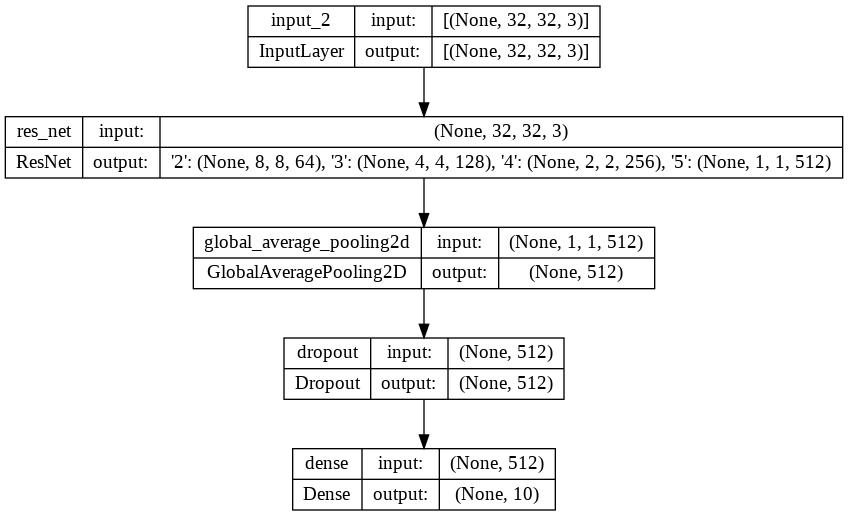

In [17]:
with distribution_strategy.scope():
  model_dir = tempfile.mkdtemp()
  task = tfm.core.task_factory.get_task(exp_config.task, logging_dir=model_dir)

tf.keras.utils.plot_model(task.build_model(), show_shapes=True)

In [18]:
for images, labels in task.build_inputs(exp_config.task.train_data).take(1):
  print()
  print(f'images.shape: {str(images.shape):16}  images.dtype: {images.dtype!r}')
  print(f'labels.shape: {str(labels.shape):16}  labels.dtype: {labels.dtype!r}')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteVYJ9HQ/cifar10-train.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteVYJ9HQ/cifar10-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.

images.shape: (128, 32, 32, 3)  images.dtype: tf.float32
labels.shape: (128,)            labels.dtype: tf.int32


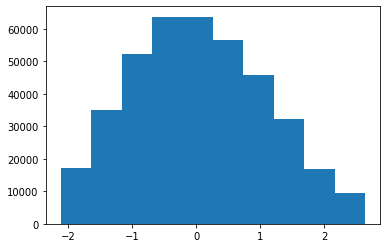

In [19]:
plt.hist(images.numpy().flatten());

In [20]:
label_info = ds_info.features['label']
label_info.int2str(1)

'automobile'

In [21]:
def show_batch(images, labels, predictions=None):
  plt.figure(figsize=(10, 10))
  min = images.numpy().min()
  max = images.numpy().max()
  delta = max - min

  for i in range(12):
    plt.subplot(6, 6, i + 1)
    plt.imshow((images[i]-min) / delta)
    if predictions is None:
      plt.title(label_info.int2str(labels[i]))
    else:
      if labels[i] == predictions[i]:
        color = 'g'
      else:
        color = 'r'
      plt.title(label_info.int2str(predictions[i]), color=color)
    plt.axis("off")

<Figure size 720x720 with 0 Axes>

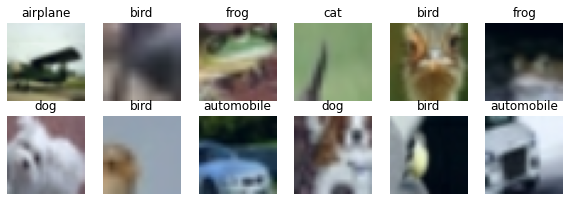

In [22]:
plt.figure(figsize=(10, 10))
for images, labels in task.build_inputs(exp_config.task.train_data).take(1):
  show_batch(images, labels)

<Figure size 720x720 with 0 Axes>

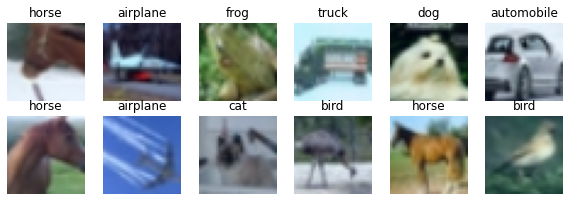

In [23]:
plt.figure(figsize=(10, 10));
for images, labels in task.build_inputs(exp_config.task.validation_data).take(1):
  show_batch(images, labels)

In [24]:
model, eval_logs = tfm.core.train_lib.run_experiment(
    distribution_strategy=distribution_strategy,
    task=task,
    mode='train_and_eval',
    params=exp_config,
    model_dir=model_dir,
    run_post_eval=True)

restoring or initializing model...
initialized model.
train | step:      0 | training until step 20...
train | step:      5 | steps/sec:    0.2 | output: 
    {'accuracy': 0.0984375,
     'learning_rate': 0.0,
     'top_5_accuracy': 0.4921875,
     'training_loss': 2.8804555}
saved checkpoint to /tmp/tmpqqeltl3o/ckpt-5.
train | step:     10 | steps/sec:    0.2 | output: 
    {'accuracy': 0.1125,
     'learning_rate': 0.0,
     'top_5_accuracy': 0.4953125,
     'training_loss': 2.8748462}
train | step:     15 | steps/sec:    0.2 | output: 
    {'accuracy': 0.1,
     'learning_rate': 0.0,
     'top_5_accuracy': 0.4765625,
     'training_loss': 2.8947246}
train | step:     20 | steps/sec:    0.2 | output: 
    {'accuracy': 0.103125,
     'learning_rate': 0.0,
     'top_5_accuracy': 0.48125,
     'training_loss': 2.8829632}
 eval | step:     20 | running 78 steps of evaluation...
 eval | step:     20 | eval time:   20.0 sec | output: 
    {'accuracy': 0.09715545,
     'top_5_accuracy': 0.5

Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`


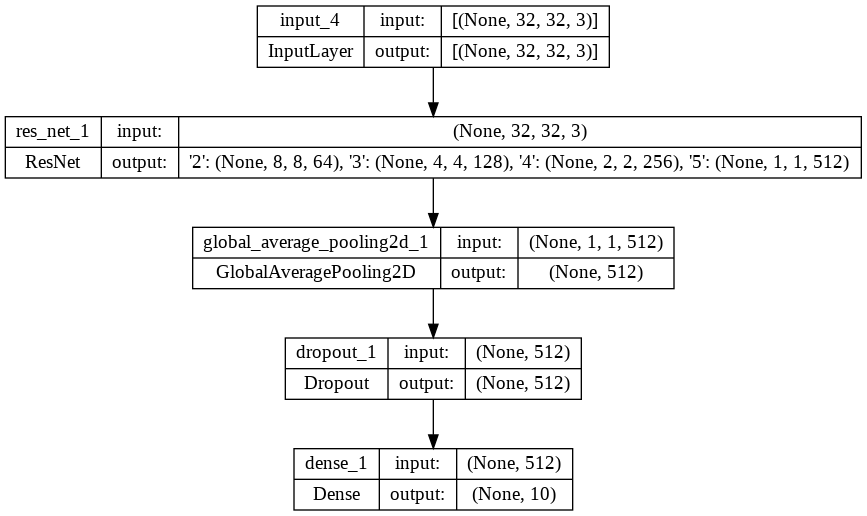

In [25]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [26]:
for key, value in eval_logs.items():
    print(f'{key:20}: {value.numpy():.3f}')

accuracy            : 0.097
top_5_accuracy      : 0.511
validation_loss     : 2.612


4/4 [==============================] - 2s 124ms/step


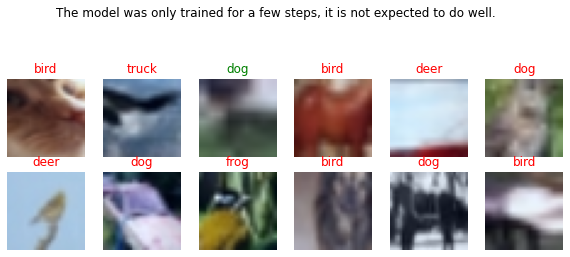

In [27]:
for images, labels in task.build_inputs(exp_config.task.train_data).take(1):
  predictions = model.predict(images)
  predictions = tf.argmax(predictions, axis=-1)

show_batch(images, labels, tf.cast(predictions, tf.int32))

if device=='CPU':
  plt.suptitle('The model was only trained for a few steps, it is not expected to do well.')

In [28]:
# Saving and exporting the trained model
export_saved_model_lib.export_inference_graph(
    input_type='image_tensor',
    batch_size=1,
    input_image_size=[32, 32],
    params=exp_config,
    checkpoint_path=tf.train.latest_checkpoint(model_dir),
    export_dir='./export/')

INFO:tensorflow:Assets written to: ./export/assets


INFO:tensorflow:Assets written to: ./export/assets


In [29]:
# Importing SavedModel
imported = tf.saved_model.load('./export/')
model_fn = imported.signatures['serving_default']

<Figure size 720x720 with 0 Axes>

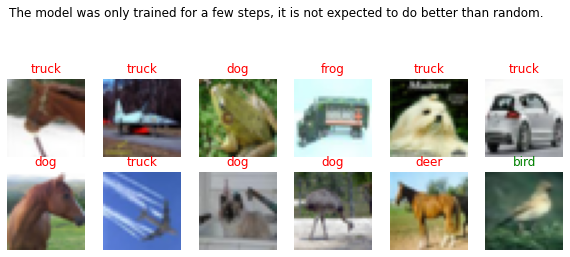

In [30]:
plt.figure(figsize=(10, 10))
for data in tfds.load('cifar10', split='test').batch(12).take(1):
  predictions = []
  for image in data['image']:
    index = tf.argmax(model_fn(image[tf.newaxis, ...])['logits'], axis=1)[0]
    predictions.append(index)
  show_batch(data['image'], data['label'], predictions)

  if device=='CPU':
    plt.suptitle('The model was only trained for a few steps, it is not expected to do better than random.')